# Database Manipulation

**Course:** HUDK 4051

**Author:** Yutong Shen

**Assignment:** ICE1

## SQL

SQL, which stands for Structured Query Language, is a language for interacting with data stored in something called a relational database.

You can think of a relational database as a collection of tables. A table is just a set of rows and columns, like a spreadsheet, which represents exactly one type of entity. For example, a table might represent employees in a company or purchases made, but not both.

Each row, or record, of a table contains information about a single entity. For example, in a table representing employees, each row represents a single person. Each column, or field, of a table contains a single attribute for all rows in the table. For example, in a table representing employees, we might have a column containing first and last names for all employees.

### SELECTing single columns

While SQL can be used to create and modify databases, the focus of this course will be querying databases. A query is a request for data from a database table (or combination of tables). Querying is an essential skill for a data scientist, since the data you need for your analyses will often live in databases.

In SQL, you can select data from a table using a SELECT statement. For example, the following query selects the name column from the people table:

* SELECT name
* FROM people;

In this query, SELECT and FROM are called keywords. In SQL, keywords are not case-sensitive, which means you can write the same query as:

* select name
* from people;

That said, it's good practice to make SQL keywords uppercase to distinguish them from other parts of your query, like column and table names.

It's also good practice (but not necessary for the exercises in this course) to include a semicolon at the end of your query. This tells SQL where the end of your query is!

### SELECTing multiple columns

To select multiple columns from a table, simply separate the column names with commas!

For example, this query selects two columns, name and birthdate, from the people table:

* SELECT name, birthdate
* FROM people;

Sometimes, you may want to select all columns from a table. Typing out every column name would be a pain, so there's a handy shortcut:

* SELECT *
* FROM people;

If you only want to return a certain number of results, you can use the LIMIT keyword to limit the number of rows returned:

* SELECT *
* FROM people
* LIMIT 10;

### SELECT DISTINCT

Often your results will include many duplicate values. If you want to select all the unique values from a column, you can use the DISTINCT keyword.

This might be useful if, for example, you're interested in knowing which languages are represented in the films table:

* SELECT DISTINCT language
* FROM films;

### Learning to COUNT

What if you want to count the number of employees in your employees table? The COUNT() function lets you do this by returning the number of rows in one or more columns.

For example, this code gives the number of rows in the people table:

* SELECT COUNT(*)
* FROM people;

### Practice with COUNT

COUNT(*) tells you how many rows are in a table. However, if you want to count the number of non-missing values in a particular column, you can call COUNT() on just that column.

For example, to count the number of birth dates present in the people table:

* SELECT COUNT(birthdate)
* FROM people;

It's also common to combine COUNT() with DISTINCT to count the number of distinct values in a column.

For example, this query counts the number of distinct birth dates contained in the people table:

* SELECT COUNT(DISTINCT birthdate)
* FROM people;

### Filtering results

In SQL, the WHERE keyword allows you to filter based on both text and numeric values in a table. There are a few different comparison operators you can use:

* = equal
* <> not equal
* < less than
* \> greater than
* <= less than or equal to
* \>= greater than or equal to

For example, you can filter text records such as title. The following code returns all films with the title 'Metropolis':

* SELECT title
* FROM films
* WHERE title = 'Metropolis';

Notice that the WHERE clause always comes after the FROM statement!

**Note that in this course we will use <> and not != for the not equal operator, as per the SQL standard.**

### Simple filtering of numeric values

The WHERE clause can be used to filter numeric records, such as years or ages.

For example, the following query selects all details for films with a budget over ten thousand dollars:

* SELECT *
* FROM films
* WHERE budget > 10000;

The WHERE clause can also be used to filter text results, such as names or countries.

For example, this query gets the titles of all films which were filmed in China:

* SELECT title
* FROM films
* WHERE country = 'China';

**Important: in PostgreSQL (the version of SQL we're using), you must use single quotes with WHERE.**

### WHERE AND

Often, you'll want to select data based on multiple conditions. You can build up your **WHERE** queries by combining multiple conditions with the **AND** keyword.

For example,

* SELECT title
* FROM films
* WHERE release_year > 1994
* AND release_year < 2000;

gives you the titles of films released between 1994 and 2000.

Note that you need to specify the column name separately for every **AND** condition, so the following would be invalid:

* SELECT title
* FROM films
* WHERE release_year > 1994 AND < 2000;
You can add as many **AND** conditions as you need!

### WHERE AND OR

What if you want to select rows based on multiple conditions where some but not all of the conditions need to be met? For this, SQL has the **OR** operator.

For example, the following returns all films released in either 1994 or 2000:

* SELECT title
* FROM films
* WHERE release_year = 1994
* OR release_year = 2000;

Note that you need to specify the column for every **OR** condition, so the following is invalid:

* SELECT title
* FROM films
* WHERE release_year = 1994 OR 2000;

When combining **AND** and **OR**, be sure to enclose the individual clauses in parentheses, like so:

* SELECT title
* FROM films
* WHERE (release_year = 1994 OR release_year = 1995)
* AND (certification = 'PG' OR certification = 'R');

Otherwise, due to SQL's precedence rules, you may not get the results you're expecting!

### WHERE AND OR (2)

You now know how to select rows that meet **some** but not **all** conditions by combining AND and OR.

For example, the following query selects all films that were released in 1994 or 1995 which had a rating of PG or R.

* SELECT title
* FROM films
* WHERE (release_year = 1994 OR release_year = 1995)
* AND (certification = 'PG' OR certification = 'R');

### BETWEEN

As you've learned, you can use the following query to get titles of all films released in and between 1994 and 2000:

* SELECT title
* FROM films
* WHERE release_year >= 1994
* AND release_year <= 2000;

Checking for ranges like this is very common, so in SQL the BETWEEN keyword provides a useful shorthand for filtering values within a specified range. This query is equivalent to the one above:

* SELECT title
* FROM films
* WHERE release_year
* BETWEEN 1994 AND 2000;

It's important to remember that BETWEEN is **inclusive**, meaning the beginning and end values are included in the results!

### BETWEEN (2)

Similar to the WHERE clause, the BETWEEN clause can be used with multiple AND and OR operators, so you can build up your queries and make them even more powerful!

For example, suppose we have a table called kids. We can get the names of all kids between the ages of 2 and 12 from the United States:

* SELECT name
* FROM kids
* WHERE age BETWEEN 2 AND 12
* AND nationality = 'USA';

### WHERE IN

As you've seen, WHERE is very useful for filtering results. However, if you want to filter based on many conditions, WHERE can get unwieldy. For example:

* SELECT name
* FROM kids
* WHERE age = 2
* OR age = 4
* OR age = 6
* OR age = 8
* OR age = 10;

Enter the IN operator! The IN operator allows you to specify multiple values in a WHERE clause, making it easier and quicker to specify multiple OR conditions! Neat, right?

So, the above example would become simply:

* SELECT name
* FROM kids
* WHERE age IN (2, 4, 6, 8, 10);

### NULL and IS NULL

In SQL, NULL represents a missing or unknown value. You can check for NULL values using the expression IS NULL. For example, to count the number of missing birth dates in the people table:

* SELECT COUNT(*)
* FROM people
* WHERE birthdate IS NULL;

As you can see, IS NULL is useful when combined with WHERE to figure out what data you're missing.

Sometimes, you'll want to filter out missing values so you only get results which are not NULL. To do this, you can use the IS NOT NULL operator.

For example, this query gives the names of all people whose birth dates are not missing in the people table.

* SELECT name
* FROM people
* WHERE birthdate IS NOT NULL;

### LIKE and NOT LIKE

As you've seen, the WHERE clause can be used to filter text data. However, so far you've only been able to filter by specifying the exact text you're interested in. In the real world, often you'll want to search for a pattern rather than a specific text string.

In SQL, the LIKE operator can be used in a WHERE clause to search for a pattern in a column. To accomplish this, you use something called a wildcard as a placeholder for some other values. There are two wildcards you can use with LIKE:

The % wildcard will match zero, one, or many characters in text. For example, the following query matches companies like 'Data', 'DataC' 'DataCamp', 'DataMind', and so on:

* SELECT name
* FROM companies
* WHERE name LIKE 'Data%';

The _ wildcard will match a single character. For example, the following query matches companies like 'DataCamp', 'DataComp', and so on:

* SELECT name
* FROM companies
* WHERE name LIKE 'DataC_mp';

You can also use the NOT LIKE operator to find records that don't match the pattern you specify.

### Aggregate functions

Often, you will want to perform some calculation on the data in a database. SQL provides a few functions, called aggregate functions, to help you out with this.

For example,

* SELECT AVG(budget)
* FROM films;

gives you the average value from the budget column of the films table. Similarly, the MAX() function returns the highest budget:

* SELECT MAX(budget)
* FROM films;

The SUM() function returns the result of adding up the numeric values in a column:

* SELECT SUM(budget)
* FROM films;

### Combining aggregate functions with WHERE

Aggregate functions can be combined with the WHERE clause to gain further insights from your data.

For example, to get the total budget of movies made in the year 2010 or later:

* SELECT SUM(budget)
* FROM films
* WHERE release_year >= 2010;

### A note on arithmetic

In addition to using aggregate functions, you can perform basic arithmetic with symbols like +, -, *, and /.

So, for example, this gives a result of 12:

* SELECT (4 * 3);

However, the following gives a result of 1:

* SELECT (4 / 3);

What's going on here?

SQL assumes that if you divide an integer by an integer, you want to get an integer back. So be careful when dividing!

If you want more precision when dividing, you can add decimal places to your numbers. For example,

* SELECT (4.0 / 3.0) AS result;

gives you the result you would expect: 1.333.

### It's AS simple AS aliasing

You may have noticed in the first exercise of this chapter that the column name of your result was just the name of the function you used. For example,

* SELECT MAX(budget)
* FROM films;

gives you a result with one column, named max. But what if you use two functions like this?

* SELECT MAX(budget), MAX(duration)
* FROM films;

Well, then you'd have two columns named max, which isn't very useful!

To avoid situations like this, SQL allows you to do something called aliasing. Aliasing simply means you assign a temporary name to something. To alias, you use the AS keyword, which you've already seen earlier in this course.

For example, in the above example we could use aliases to make the result clearer:

* SELECT MAX(budget) AS max_budget,
       MAX(duration) AS max_duration
* FROM films;

Aliases are helpful for making results more readable!

### Even more aliasing

**Recall:** SQL assumes that if you divide an integer by an integer, you want to get an integer back.

This means that the following will erroneously result in 400.0:

* SELECT 45 / 10 * 100.0;

This is because 45 / 10 evaluates to an integer (4), and not a decimal number like we would expect.

So when you're dividing make sure at least one of your numbers has a decimal place:

* SELECT 45 * 100.0 / 10;

The above now gives the correct answer of 450.0 since the numerator (45 * 100.0) of the division is now a decimal!

### ORDER BY

In SQL, the ORDER BY keyword is used to sort results in ascending or descending order according to the values of one or more columns.

By default ORDER BY will sort in ascending order. If you want to sort the results in descending order, you can use the DESC keyword. For example,

* SELECT title
* FROM films
* ORDER BY release_year DESC;

gives you the titles of films sorted by release year, from newest to oldest.

### Sorting single columns (DESC)

To order results in descending order, you can put the keyword DESC after your ORDER BY. For example, to get all the names in the people table, in reverse alphabetical order:

* SELECT name
* FROM people
* ORDER BY name DESC;

### Sorting multiple columns

ORDER BY can also be used to sort on multiple columns. It will sort by the first column specified, then sort by the next, then the next, and so on. For example,

* SELECT birthdate, name
* FROM people
* ORDER BY birthdate, name;

sorts on birth dates first (oldest to newest) and then sorts on the names in alphabetical order. **The order of columns is important!**

Try using ORDER BY to sort multiple columns! Remember, to specify multiple columns you separate the column names with a comma.

### GROUP BY

Now you know how to sort results! Often you'll need to aggregate results. For example, you might want to count the number of male and female employees in your company. Here, what you want is to group all the males together and count them, and group all the females together and count them. In SQL, GROUP BY allows you to group a result by one or more columns, like so:

* SELECT sex, count(*)
* FROM employees
* GROUP BY sex;

Commonly, GROUP BY is used with aggregate functions like COUNT() or MAX(). Note that **GROUP BY always goes after the FROM clause!**

A word of warning: SQL will return an error if you try to SELECT a field that is not in your GROUP BY clause without using it to calculate some kind of value about the entire group.

Note that you can combine GROUP BY with ORDER BY to group your results, calculate something about them, and then order your results. For example,

* SELECT sex, count(*)
* FROM employees
* GROUP BY sex
* ORDER BY count DESC;

Note also that **ORDER BY always goes after GROUP BY.**

### HAVING a great time

In SQL, **aggregate functions can't be used in WHERE clauses.** For example, the following query is invalid:

* SELECT release_year
* FROM films
* GROUP BY release_year
* WHERE COUNT(title) > 10;

This means that if you want to filter based on the result of an aggregate function, you need another way! That's where the HAVING clause comes in. For example,

* SELECT release_year
* FROM films
* GROUP BY release_year
* HAVING COUNT(title) > 10;

shows only those years in which more than 10 films were released.

### Statement of accomplishment from Data Camp 

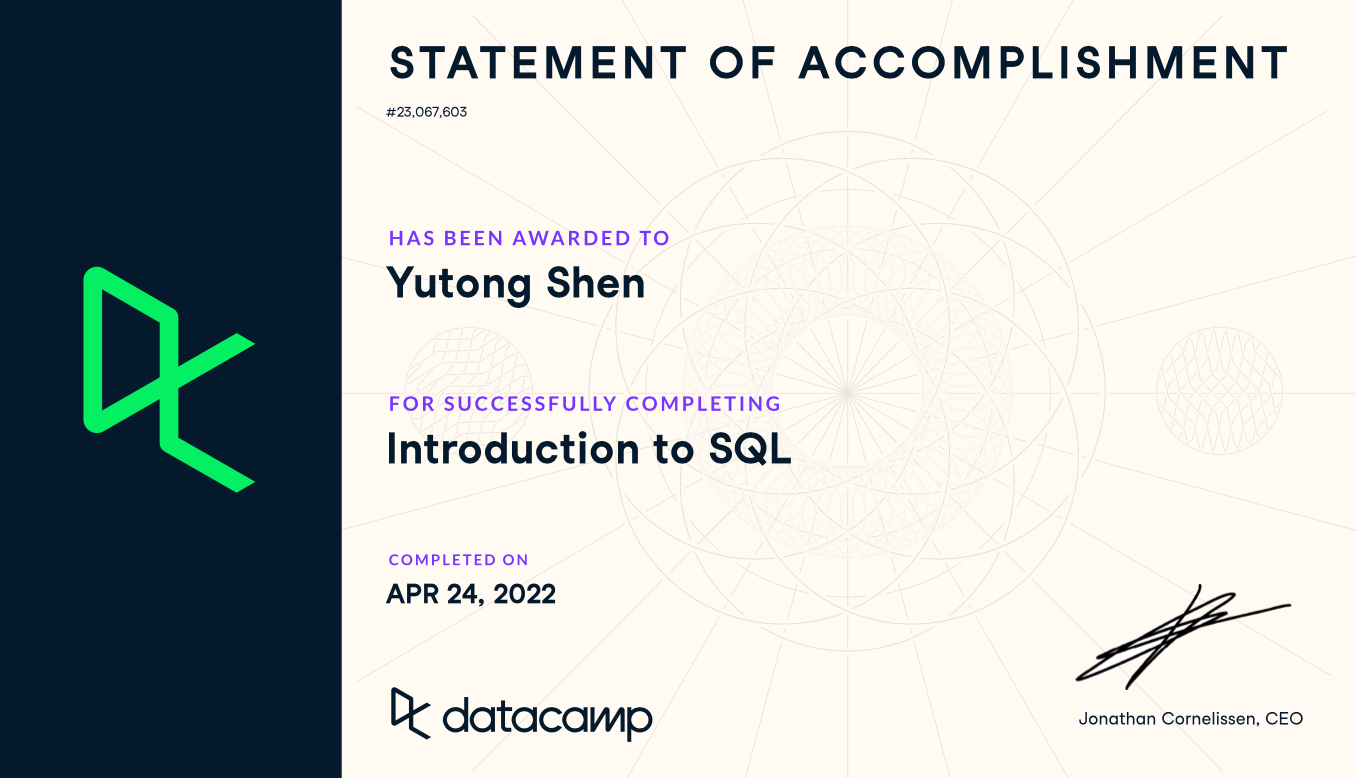